In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the csv files
clean_2020_data = Path("output/clean_2020.csv")
clean_2023_data = Path("output/clean_2023.csv")

In [3]:
# Create dataframes from the imported csv files
clean_2020_df = pd.read_csv(clean_2020_data)
clean_2023_df = pd.read_csv(clean_2023_data)

In [ ]:
# Display the cleaned 2020 dataframe
clean_2020_df.head()

In [ ]:
# Display the cleaned 2023 dataframe
clean_2023_df.head()

In [4]:
# Narrow the data to individual cities for each year
san_francisco_2020 = clean_2020_df.loc[(clean_2020_df["City"] == "San Francisco")]
new_york_2020 = clean_2020_df.loc[(clean_2020_df["City"] == "New York City")]
twin_cities_2020 = clean_2020_df.loc[(clean_2020_df["City"] == "Twin Cities MSA")]
san_francisco_2023 = clean_2023_df.loc[(clean_2023_df["City"] == "San Francisco")]
new_york_2023 = clean_2023_df.loc[(clean_2023_df["City"] == "New York City")]
twin_cities_2023 = clean_2023_df.loc[(clean_2023_df["City"] == "Twin Cities MSA")]

In [21]:
# Calculate mean, median, and mode for each DataFrame
san_francisco_2020_mean = round(san_francisco_2020["Price"].mean(), 2)
san_francisco_2020_median = round(san_francisco_2020["Price"].median(), 2)
san_francisco_2020_mode = san_francisco_2020["Price"].mode()
san_francisco_2023_mean = round(san_francisco_2023["Price"].mean(), 2)
san_francisco_2023_median = round(san_francisco_2023["Price"].median(), 2)
san_francisco_2023_mode = san_francisco_2023["Price"].mode()

new_york_2020_mean = round(new_york_2020["Price"].mean(), 2)
new_york_2020_median = round(new_york_2020["Price"].median(), 2)
new_york_2020_mode = new_york_2020["Price"].mode()
new_york_2023_mean = round(new_york_2023["Price"].mean(), 2)
new_york_2023_median = round(new_york_2023["Price"].median(), 2)
new_york_2023_mode = new_york_2023["Price"].mode()

twin_cities_2020_mean = round(twin_cities_2020["Price"].mean(), 2)
twin_cities_2020_median = round(twin_cities_2020["Price"].median(), 2)
twin_cities_2020_mode = twin_cities_2020["Price"].mode()
twin_cities_2023_mean = round(twin_cities_2023["Price"].mean(), 2)
twin_cities_2023_median = round(twin_cities_2023["Price"].median(), 2)
twin_cities_2023_mode = twin_cities_2023["Price"].mode()


In [22]:
# Create a new DataFrame with the mean, median, mode information
summary_data = {
    'City/Year': ['San Francisco 2020', 'San Francisco 2023', 'New York City 2020', 'New York City 2023',
                  'Twin Cities 2020', 'Twin Cities 2023'],
    'Mean': [
        san_francisco_2020_mean, san_francisco_2023_mean,
        new_york_2020_mean, new_york_2023_mean,
        twin_cities_2020_mean, twin_cities_2023_mean
    ],
    'Median': [
        san_francisco_2020_median, san_francisco_2023_median,
        new_york_2020_median, new_york_2023_median,
        twin_cities_2020_median, twin_cities_2023_median
    ],
    'Mode': [
        san_francisco_2020["Price"].mode().iloc[0], san_francisco_2023["Price"].mode().iloc[0],
        new_york_2020["Price"].mode().iloc[0], new_york_2023["Price"].mode().iloc[0],
        twin_cities_2020["Price"].mode().iloc[0], twin_cities_2023["Price"].mode().iloc[0]
    ]
}

# Create a DataFrame
summary_data_df = pd.DataFrame(summary_data)

# Print the resulting DataFrame
summary_data_df

,City/Year,Mean,Median,Mode
0,San Francisco 2020,202.77,138.0,150
1,San Francisco 2023,324.52,150.0,120
2,New York City 2020,157.28,100.0,150
3,New York City 2023,218.03,134.0,150
4,Twin Cities 2020,364.55,120.0,75
5,Twin Cities 2023,181.99,120.0,100


In [23]:
# Export summary data to csv
summary_data_df.to_csv("output/summary_data.csv")

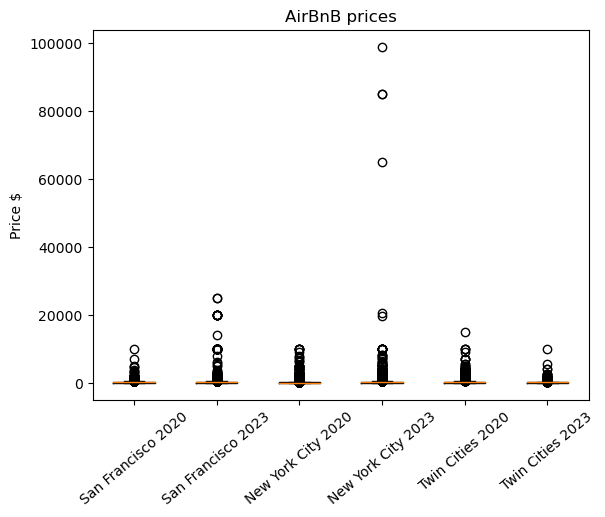

In [37]:
# Create a boxplot for summary data
plot_data = [san_francisco_2020["Price"], san_francisco_2023["Price"], new_york_2020["Price"], new_york_2023["Price"], twin_cities_2020["Price"], twin_cities_2023["Price"]]

fig, ax1 = plt.subplots()
ax1.set_title('AirBnB prices')
ax1.set_ylabel('Price $')
ax1.boxplot(plot_data)
# plt.ylim(0, 2000)
plt.xticks([1, 2, 3, 4, 5, 6], ["San Francisco 2020", "San Francisco 2023", "New York City 2020", "New York City 2023", "Twin Cities 2020", "Twin Cities 2023"], rotation=40)

plt.show()